In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire
import prepare
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import metrics

## Decision Tree Exercises

In [2]:
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())
train.head()

/Users/christophermayorga/Desktop/codeup-data-science/classification-exercises/prepare.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [3]:
train.shape

(498, 9)

In [4]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

1.) What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [5]:
train['baseline'] = 0

In [6]:
print(f'Our baseline accuracy is: {metrics.accuracy_score(train.survived, train.baseline):.2%}')

Our baseline accuracy is: 61.65%


2.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [7]:
X_cols = ['pclass', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [8]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.21%


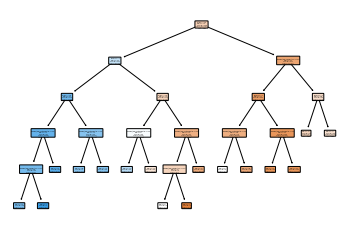

In [9]:
plot_tree(model1, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)
plt.show()

In [10]:
train['model1'] = model1.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1
474,0,3,0,0,9.8375,1,0,0,1,0,0
370,1,1,1,0,55.4417,0,1,0,0,0,1
573,1,3,0,0,7.7500,1,0,1,0,0,0
110,0,1,0,0,52.0000,1,1,0,1,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0


In [11]:
print(metrics.accuracy_score(train.survived, train.model1))

0.751004016064257


3.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [12]:
print(f'model1 score: {model1.score(X_train, y_train):.2%}')

model1 score: 75.10%


In [13]:
labels = sorted(train.survived.unique())

pd.DataFrame(metrics.confusion_matrix(train.survived, train.model1), index=labels, columns=labels)

,0,1
0,274,33
1,91,100


In [14]:
pd.crosstab(train.survived, train.model1)

model1,0,1
survived,,
0,274,33
1,91,100


In [15]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model1, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.750685,0.751880,0.751004,0.751282,0.751143
recall,0.892508,0.523560,0.751004,0.708034,0.751004
f1-score,0.815476,0.617284,0.751004,0.716380,0.739463
support,307.000000,191.000000,0.751004,498.000000,498.000000


4.) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [16]:
pd.crosstab(train.survived, train.model1, normalize=True)

model1,0,1
survived,,
0,0.550201,0.066265
1,0.182731,0.200803


Positive: died, 0
Negative: survived, 1

- True positive: 55% (predict they died, actually died)
- True negative: 20% (predict they lived, actually lived)
- False positive: 18% (predict they lived, but actually died)
- False negative: 7% (predict they died, but actually lived)

In [17]:
# These define positive as 1
metrics.precision_score(train.survived, train.model1)

0.7518796992481203

In [18]:
metrics.recall_score(train.survived, train.model1)

0.5235602094240838

In [19]:
metrics.f1_score(train.survived, train.model1)

0.6172839506172839

In [20]:
# These are the scores when positive is defined as 0
cr['0']

precision      0.750685
recall         0.892508
f1-score       0.815476
support      307.000000
Name: 0, dtype: float64

In [21]:
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(X_train, y_train)

print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

training score: 69.48%
validate score: 63.08%


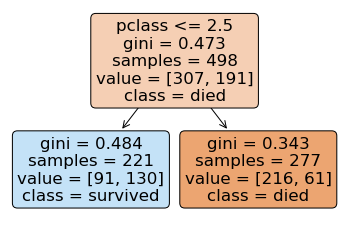

In [22]:
plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)
plt.show()

In [23]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, y_train)

print(f'training score: {model3.score(X_train, y_train):.2%}')
print(f'validate score: {model3.score(X_validate, y_validate):.2%}')

training score: 74.30%
validate score: 62.62%


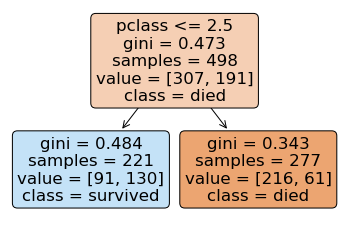

In [24]:
plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)
plt.show()

In [25]:
model4 = DecisionTreeClassifier(max_depth=5)
model4.fit(X_train, y_train)

print(f'training score: {model4.score(X_train, y_train):.2%}')
print(f'validate score: {model4.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.21%


In [26]:
# All have pretty similar scores

## Random Forest Exercises

1.) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model5 = RandomForestClassifier(random_state=1349, max_depth=10)

In [29]:
model5.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1349)

In [30]:
train['model5'] = model5.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1,model5
474,0,3,0,0,9.8375,1,0,0,1,0,0,0
370,1,1,1,0,55.4417,0,1,0,0,0,1,1
573,1,3,0,0,7.7500,1,0,1,0,0,0,0
110,0,1,0,0,52.0000,1,1,0,1,0,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0,0


2.) Evaluate your results using the model score, confusion matrix, and classification report.

In [31]:
print(f'training score: {model5.score(X_train, y_train):.2%}')
print(f'validate score: {model5.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 62.15%


In [32]:
pd.crosstab(train.survived, train.model5, margins=True)

model5,0,1,All
survived,,,
0,269,38,307
1,86,105,191
All,355,143,498


In [33]:
pd.crosstab(train.survived, train.model5, normalize=True, margins=True)

model5,0,1,All
survived,,,
0,0.540161,0.076305,0.616466
1,0.172691,0.210843,0.383534
All,0.712851,0.287149,1.000000


In [34]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model5, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.757746,0.734266,0.751004,0.746006,0.748741
recall,0.876221,0.549738,0.751004,0.712980,0.751004
f1-score,0.812689,0.628743,0.751004,0.720716,0.742139
support,307.000000,191.000000,0.751004,498.000000,498.000000


In [35]:
cr['0'][3]

307.0

3.) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [36]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model5):.2%}')
print(f'True positive rate: {(105/498):.2%}')
print(f'False positive rate: {(38/498):.2%}')
print(f'True negative rate: {(269/498):.2%}')
print(f'False negative rate: {(86/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model5):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model5):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model5):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 75.10%
True positive rate: 21.08%
False positive rate: 7.63%
True negative rate: 54.02%
False negative rate: 17.27%
Precision: 73.43%
Recall: 54.97%
F1-score: 62.87%
Support: Died: 307.0, Survived: 191.0


4.) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [37]:
model6 = RandomForestClassifier(min_samples_leaf=5, random_state=1349, max_depth=5)
model6.fit(X_train, y_train)
train['model6'] = model6.predict(X_train)

In [38]:
# Accuracy score
print(f'training score: {model6.score(X_train, y_train):.2%}')
print(f'validate score: {model6.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.21%


In [39]:
pd.crosstab(train.survived, train.model6, margins=True)

model6,0,1,All
survived,,,
0,274,33,307
1,91,100,191
All,365,133,498


In [40]:
pd.crosstab(train.survived, train.model5, normalize=True, margins=True)

model5,0,1,All
survived,,,
0,0.540161,0.076305,0.616466
1,0.172691,0.210843,0.383534
All,0.712851,0.287149,1.000000


In [41]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model6, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.750685,0.751880,0.751004,0.751282,0.751143
recall,0.892508,0.523560,0.751004,0.708034,0.751004
f1-score,0.815476,0.617284,0.751004,0.716380,0.739463
support,307.000000,191.000000,0.751004,498.000000,498.000000


In [42]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model6):.2%}')
print(f'True positive rate: {(100/498):.2%}')
print(f'False positive rate: {(33/498):.2%}')
print(f'True negative rate: {(274/498):.2%}')
print(f'False negative rate: {(91/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model6):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model6):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model6):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 75.10%
True positive rate: 20.08%
False positive rate: 6.63%
True negative rate: 55.02%
False negative rate: 18.27%
Precision: 75.19%
Recall: 52.36%
F1-score: 61.73%
Support: Died: 307.0, Survived: 191.0


In [43]:
model7 = RandomForestClassifier(min_samples_leaf=2, random_state=1349, max_depth=7)
model7.fit(X_train, y_train)
train['model7'] = model7.predict(X_train)

In [44]:
print(f'training score: {model7.score(X_train, y_train):.2%}')
print(f'validate score: {model7.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.68%


In [45]:
pd.crosstab(train.survived, train.model7, margins=True)

model7,0,1,All
survived,,,
0,271,36,307
1,88,103,191
All,359,139,498


In [46]:
pd.crosstab(train.survived, train.model7, normalize=True, margins=True)

model7,0,1,All
survived,,,
0,0.544177,0.072289,0.616466
1,0.176707,0.206827,0.383534
All,0.720884,0.279116,1.000000


In [47]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model7, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.754875,0.741007,0.751004,0.747941,0.749556
recall,0.882736,0.539267,0.751004,0.711002,0.751004
f1-score,0.813814,0.624242,0.751004,0.719028,0.741107
support,307.000000,191.000000,0.751004,498.000000,498.000000


In [48]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model7):.2%}')
print(f'True positive rate: {(103/498):.2%}')
print(f'False positive rate: {(36/498):.2%}')
print(f'True negative rate: {(271/498):.2%}')
print(f'False negative rate: {(88/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model7):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model7):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model7):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 75.10%
True positive rate: 20.68%
False positive rate: 7.23%
True negative rate: 54.42%
False negative rate: 17.67%
Precision: 74.10%
Recall: 53.93%
F1-score: 62.42%
Support: Died: 307.0, Survived: 191.0


5.) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Accuracy: how many deaths and survivals you predicted correctly out of the total passengers
- Recall: how many survivals you predicted correctly out of predicted survived/actual survived + predicted died/actual survived
- Precision: how many survivals you predicted correctly out of predicted survived/actual survived + predicted survived/actual died

Accuracy performs the best because it takes into account both predicted deaths and survivals, while precision and recall only take into account predicted survivals.

Model 5 had the best performance.

We are picking recall because it would be optimal to catch as many survivors as possible.

## K Nearest Neighbor Exercises

In [49]:
from sklearn.neighbors import KNeighborsClassifier

1.) Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [50]:
model8 = KNeighborsClassifier(n_neighbors=4)
model8.fit(X_train, y_train)
train['model8'] = model8.predict(X_train)

2.) Evaluate your results using the model score, confusion matrix, and classification report.

In [51]:
# Accuracy score
print(f'training score: {model8.score(X_train, y_train):.2%}')
print(f'validate score: {model8.score(X_validate, y_validate):.2%}')

training score: 67.27%
validate score: 52.34%


In [52]:
pd.crosstab(train.survived, train.model8, margins=True)

model8,0,1,All
survived,,,
0,223,84,307
1,79,112,191
All,302,196,498


In [53]:
pd.crosstab(train.survived, train.model8, margins=True, normalize=True)

model8,0,1,All
survived,,,
0,0.447791,0.168675,0.616466
1,0.158635,0.224900,0.383534
All,0.606426,0.393574,1.000000


In [54]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model8, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.738411,0.571429,0.672691,0.654920,0.674367
recall,0.726384,0.586387,0.672691,0.656386,0.672691
f1-score,0.732348,0.578811,0.672691,0.655580,0.673462
support,307.000000,191.000000,0.672691,498.000000,498.000000


3.) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [55]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model8):.2%}')
print(f'True positive rate: {(112/498):.2%}')
print(f'False positive rate: {(84/498):.2%}')
print(f'True negative rate: {(223/498):.2%}')
print(f'False negative rate: {(79/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model8):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model8):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model8):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 67.27%
True positive rate: 22.49%
False positive rate: 16.87%
True negative rate: 44.78%
False negative rate: 15.86%
Precision: 57.14%
Recall: 58.64%
F1-score: 57.88%
Support: Died: 307.0, Survived: 191.0


4.) Run through steps 2-4 setting k to 10

In [56]:
model9 = KNeighborsClassifier(n_neighbors=10)
model9.fit(X_train, y_train)
train['model9'] = model9.predict(X_train)

In [57]:
# Accuracy score
print(f'training score: {model9.score(X_train, y_train):.2%}')
print(f'validate score: {model9.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.68%


In [58]:
pd.crosstab(train.survived, train.model9, margins=True)

model9,0,1,All
survived,,,
0,271,36,307
1,88,103,191
All,359,139,498


In [59]:
pd.crosstab(train.survived, train.model9, margins=True, normalize=True)

model9,0,1,All
survived,,,
0,0.544177,0.072289,0.616466
1,0.176707,0.206827,0.383534
All,0.720884,0.279116,1.000000


In [60]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model9, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.754875,0.741007,0.751004,0.747941,0.749556
recall,0.882736,0.539267,0.751004,0.711002,0.751004
f1-score,0.813814,0.624242,0.751004,0.719028,0.741107
support,307.000000,191.000000,0.751004,498.000000,498.000000


In [61]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model9):.2%}')
print(f'True positive rate: {(103/498):.2%}')
print(f'False positive rate: {(36/498):.2%}')
print(f'True negative rate: {(271/498):.2%}')
print(f'False negative rate: {(88/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model9):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model9):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model9):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 75.10%
True positive rate: 20.68%
False positive rate: 7.23%
True negative rate: 54.42%
False negative rate: 17.67%
Precision: 74.10%
Recall: 53.93%
F1-score: 62.42%
Support: Died: 307.0, Survived: 191.0


5.) Run through setps 2-4 setting k to 20

In [62]:
model10 = KNeighborsClassifier(n_neighbors=20)
model10.fit(X_train, y_train)
train['model10'] = model10.predict(X_train)

In [63]:
# Accuracy score
print(f'training score: {model10.score(X_train, y_train):.2%}')
print(f'validate score: {model10.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.68%


In [64]:
pd.crosstab(train.survived, train.model10, margins=True)

model10,0,1,All
survived,,,
0,271,36,307
1,88,103,191
All,359,139,498


In [65]:
pd.crosstab(train.survived, train.model10, margins=True, normalize=True)

model10,0,1,All
survived,,,
0,0.544177,0.072289,0.616466
1,0.176707,0.206827,0.383534
All,0.720884,0.279116,1.000000


In [66]:
cr = pd.DataFrame(metrics.classification_report(train.survived, train.model10, output_dict=True))
cr

,0,1,accuracy,macro avg,weighted avg
precision,0.754875,0.741007,0.751004,0.747941,0.749556
recall,0.882736,0.539267,0.751004,0.711002,0.751004
f1-score,0.813814,0.624242,0.751004,0.719028,0.741107
support,307.000000,191.000000,0.751004,498.000000,498.000000


In [67]:
print(f'Accuracy: {metrics.accuracy_score(y_train, train.model10):.2%}')
print(f'True positive rate: {(103/498):.2%}')
print(f'False positive rate: {(36/498):.2%}')
print(f'True negative rate: {(271/498):.2%}')
print(f'False negative rate: {(88/498):.2%}')
print(f'Precision: {metrics.precision_score(y_train, train.model10):.2%}')
print(f'Recall: {metrics.recall_score(y_train, train.model10):.2%}')
print(f'F1-score: {metrics.f1_score(y_train, train.model10):.2%}')
print(f"Support: Died: {cr['0'][3]}, Survived: {cr['1'][3]}")

Accuracy: 75.10%
True positive rate: 20.68%
False positive rate: 7.23%
True negative rate: 54.42%
False negative rate: 17.67%
Precision: 74.10%
Recall: 53.93%
F1-score: 62.42%
Support: Died: 307.0, Survived: 191.0


6.) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Accuracy: how many deaths and survivals you predicted correctly out of the total passengers
- Recall: how many survivals you predicted correctly out of predicted survived/actual survived + predicted died/actual survived
- Precision: how many survivals you predicted correctly out of predicted survived/actual survived + predicted survived/actual died

Accuracy performs the best because it takes into account both predicted deaths and survivals, while precision and recall only take into account predicted survivals.

7.) Which model performs best on our out-of-sample data from validate?

Model 9 performs the best on the validate dataset.

## Logistic Regression Exercises

For all of the models you create, choose a threshold that optimizes for accuracy.

In [68]:
from sklearn.linear_model import LogisticRegression

1.) Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [69]:
train, validate, test = prepare.prep_titanic_data_for_logit(acquire.get_titanic_data())

/Users/christophermayorga/Desktop/codeup-data-science/classification-exercises/prepare.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [70]:
X_cols = ['pclass', 'age', 'fare']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [71]:
train['baseline'] = 0

In [72]:
# Accuracy score of baseline
print(f'Our baseline accuracy is: {metrics.accuracy_score(train.survived, train.baseline):.2%}')

Our baseline accuracy is: 61.65%


In [73]:
# Make the model
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [74]:
# Fit the model
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [75]:
# Make predictions
y_pred = logit.predict(X_train)

In [76]:
# Compute accuracy score
logit.score(X_train, y_train)

0.38353413654618473

No, this model does not perform better than the baseline.

2.) Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [77]:
X_cols = ['pclass', 'age', 'fare', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [78]:
logit2 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')
logit2.fit(X_train, y_train)
y_pred2 = logit2.predict(X_train)

In [79]:
logit2.score(X_train, y_train)

0.38353413654618473

This model performs just as badly.

3.) Try out other combinations of features and models.

In [80]:
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())

/Users/christophermayorga/Desktop/codeup-data-science/classification-exercises/prepare.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [81]:
train['baseline'] = 0

In [82]:
X_cols = ['pclass', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [84]:
logit3 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')
logit3.fit(X_train, y_train)
y_pred3 = logit3.predict(X_train)

In [85]:
logit3.score(X_train, y_train)

0.38353413654618473

Even changing the features doesn't make it any better.

In [86]:
logit4 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123)
logit4.fit(X_train, y_train)
y_pred4 = logit4.predict(X_train)

In [87]:
logit4.score(X_train, y_train)

0.38353413654618473

Still no change.

4.) Use you best 3 models to predict and evaluate on your validate sample.

Model 2, Model 5, Model 9

In [89]:
print(f'Model 2 accuracy score: {model2.score(X_validate, y_validate):.2%}')
print(f'Model 5 accuracy score: {model5.score(X_validate, y_validate):.2%}')
print(f'Model 9 accuracy score: {model9.score(X_validate, y_validate):.2%}')

Model 2 accuracy score: 63.08%
Model 5 accuracy score: 62.15%
Model 9 accuracy score: 61.68%


5.) Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [90]:
print(f'Model 2 accuracy score: {model2.score(X_test, y_test):.2%}')

Model 2 accuracy score: 63.69%


Not too bad.